# Exemplo de um CMP gather sintético

Nesta atividade iremos utilizar um conjunto de traços sintéticos que forma um CMP gather. Este notebook é baseado na série de tutoriais publicados na [Society of Exploration Geophysics (SEG)](https://seg.org/) na revista *The Leading Edge*. Estes dados foram gerados utilizando uma modelagem simples de três camadas, que estão publicadas no repositório do GitHub chamado [NMO-tutorial](https://github.com/pinga-lab/nmo-tutorial/blob/master/step-by-step-nmo.ipynb), que tem todos os códigos relativos a publicação. Este é um trabalho realizado pelo [Grupo de Problemas Inversos em Geofísica (PINGA)](https://www.pinga-lab.org/).

**Referências**:

Uieda, L. Step-by-step NMO correction. The Leading Edge, 2017. doi:10.1190/tle36020179.1 

## Importando bibliotecas

Importando as bibliotecas que serão utilizadas para manipulação e visualização dos dados.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import segyio
import pandas as pd

## Lendo o arquivo com os dados sintéticos

In [2]:
data = np.load('data_set/synthetic_cmp.npz')
print("Data in the archive:", data.keys())

Data in the archive: KeysView(<numpy.lib.npyio.NpzFile object at 0x7fa3a86f6f50>)


In [3]:
dt = data['dt']
offsets = data['offsets']
cmp = data['CMP']
nsamples = cmp.shape[0]
noffsets = cmp.shape[1]
print('dt = {} s'.format(dt))
print('offsets =', offsets)
print('N samples = {}'.format(nsamples))
print('N offsets = {}'.format(noffsets))

dt = 0.00045678391959799 s
offsets = [120 180 240 300 360 420 480 540 600 660 720 780 840 900]
N samples = 1200
N offsets = 14


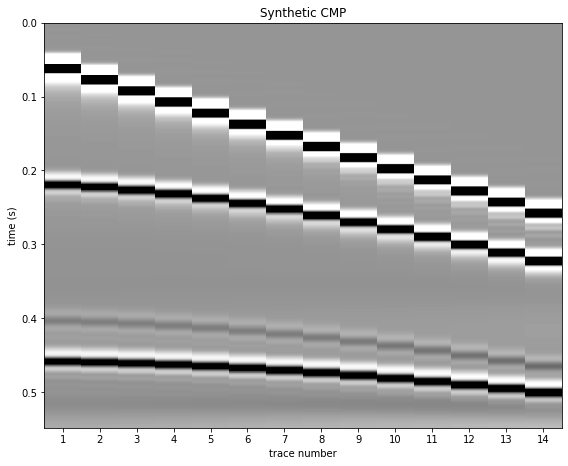

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)
ax.set_title('Synthetic CMP')
ax.set_xlabel('trace number')
ax.set_ylabel('time (s)')
cutoff = 0.1
ax.imshow(cmp, extent=[0.5, noffsets + 0.5, dt*nsamples, 0], 
          aspect=20, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='none')
trace_numbers = list(range(1, noffsets + 1))
ax.set_xticks(trace_numbers)
fig.tight_layout()